In [ ]:
#@title 💡 Bài 1 | Tính F1-Score - Cách 1
tp = 2
fp = 4
fn = 5
import math
def bai1(tp,fp,fn):
  if type(tp) != int or type(fp) != int or type(fn) != int:
    if type(tp) != int:
      print(f"Type tp : {type(tp).__name__} - tp must be int")
    if type(fp) != int:
      print(f"Type fp : {type(fp).__name__} - fp must be int")
    if type(fn) != int:
      print(f"Type fn : {type(fn).__name__} - fn must be int")
  else:
    if tp <= 0 or fp <= 0 or fn <= 0:
      print("tp and fp and fn must be greater than zero")
    else:
      precision = tp/(tp+fp)
      recall = tp/(tp+fn)
      f1 = 2*precision*recall/(precision+recall)
      print(f"Precision: {f1}")
      print(f"Recall: {recall}")
      print(f"F1-Score: {f1}")
      # return f1
bai1(tp,fp,fn)

Precision: 0.30769230769230765
Recall: 0.2857142857142857
F1-Score: 0.30769230769230765


0.30769230769230765

In [ ]:
#@title 💡 Bài 1 | Tính F1-Score - Cách 2
tp = 22
fp = 2
fn = 3

def bai1(tp,fp,fn):
  bien = [tp,fp,fn]
  name = ['tp','fp','fn']
  for i in bien :
    if type(i) != int:
      return print(f"Type {name[bien.index(i)]} : {type(i).__name__} - {name[bien.index(i)]} cần phải là số nguyên")
    if i <= 0:
      return print(f"{name[bien.index(i)]} cần phải lớn hơn 0")
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2*precision*recall/(precision+recall)
  print(f"Precision: {f1}")
  print(f"Recall: {recall}")
  print(f"F1-Score: {f1}")
  # return f1
bai1(tp,fp,fn)

Precision: 0.8979591836734694
Recall: 0.88
F1-Score: 0.8979591836734694


In [ ]:
#@title 💡 Bài 2 | Tính x theo hàm Sigmoid, Relu, Elu

import math

x = input('Nhập x: ')
activation_function = input('Activation Function: ')

function_list = ['sigmoid','relu','elu']

def is_number(input):
  try:
    float(input)
    return True
  except ValueError:
    return False
def function_check(input):
  if input in function_list:
    return True
def sigmoid(x):
  return 1/(1+math.e**-x)
def relu(x):
  if x>0:
    return x
  else:
    return 0
def elu(x):
  alpha = 0.01
  if x>0:
    return x
  else:
    return alpha*(math.e**x - 1)

fun_name = [sigmoid,relu,elu]

def activation_fun(x):
  if is_number(x) == False :
    return print('x must be a number')
  if function_check(activation_function) == None:
    return print('activation function must be sigmoid, relu or elu')
  x = float(x)
  y = fun_name[function_list.index(activation_function)](x)
  return print(f'{activation_function.capitalize()}: f(x) = {y}')

activation_fun(x)

Nhập x: 3
Activation Function: sigmoid
Sigmoid: f(x) = 0.9525741268224331


Nhập num samples: 4
Nhập loss name: rmse
------------------------
Rmse - Sample[1] - predict: 5.85376879187953 - target: 3.6866609874045073
Rmse - Sample[2] - predict: 1.3689927346698283 - target: 7.527526158099099
Rmse - Sample[3] - predict: 5.887561389392292 - target: 5.903463765528036
Rmse - Sample[4] - predict: 6.322913393949243 - target: 4.473040404753035
------------------------
Loss rmse: 3.797472662640972


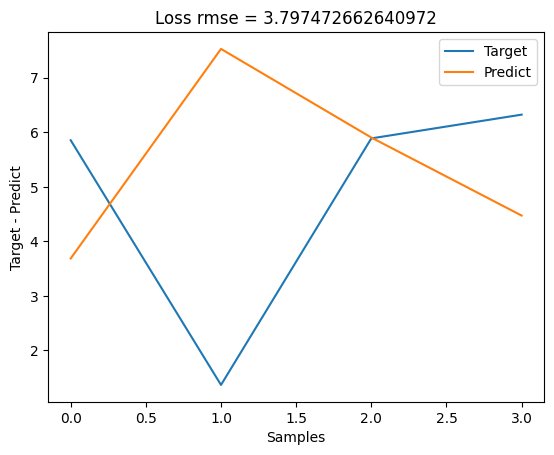

In [ ]:
#@title 💡 Bài 3 | Tính MAE - MSE - RMSE  - Graph

import math
import random

num_samples = input('Nhập num samples: ')
loss_name = input('Nhập loss name: ')

loss_list = ['mae','mse','rmse']

minrange = 0
maxrange = 10

def is_int(input):
  try:
    int(input)
    return True
  except ValueError:
    return False
def loss_check(input):
  if input in loss_list:
    return True
def random_p_t(n):
  ptrandom =[]
  for i in range(n):
    ptrandom.append(random.uniform(minrange,maxrange))
  return ptrandom
def mae(n):
  predict = random_p_t(n)
  target = random_p_t(n)
  loss_result = 0
  for i in range(n):
    loss_result = loss_result + abs(predict[i]-target[i])
  loss_result = loss_result/n
  return loss_result, predict, target
def mse(n):
  predict = random_p_t(n)
  target = random_p_t(n)
  loss_result = 0
  for i in range(n):
    loss_result = loss_result + (predict[i]-target[i])**2
  loss_result = loss_result/n
  return loss_result, predict, target
def rmse(n):
  predict = random_p_t(n)
  target = random_p_t(n)
  loss_result = mse(n)[0]
  for i in range(n):
    loss_result = loss_result + (predict[i]-target[i])**2
  loss_result = math.sqrt(loss_result/n)
  return loss_result, predict, target

loss_list_fun = [mae,mse,rmse]

def graph(result):
  import matplotlib.pyplot as plt
  # Trục x,y
  x = list(range(len(result[1])))
  y1 = result[1]
  y2 = result[2]

  # Vẽ đồ thị
  plt.plot(x, y1, label='Target', marker='')
  plt.plot(x, y2, label='Predict', marker='')
  plt.xlabel('Samples')
  plt.ylabel('Target - Predict')

  # Đặt tiêu đề cho đồ thị
  plt.title(f'Loss {loss_name} = {result[0]}')

  plt.legend()
  plt.show()

def cal_loss(n):
  if is_int(n) == False :
    return print('num samples must be a int')
  if loss_check(loss_name) == None:
    return print('loss function must be mae, mse or rmse')
  n=int(n)
  result = loss_list_fun[loss_list.index(loss_name)](n)
  print('------------------------')
  for i in range(n):
    print(f'{loss_name.capitalize()} - Sample[{i+1}] - predict: {result[1][i]} - target: {result[2][i]}')
  print('------------------------')
  print(f'Loss {loss_name}: {result[0]}')
  graph(result)

cal_loss(num_samples)

Nhập num samples: 10
Nhập loss name: rmse
------------------------
Rmse - Sample[1] - predict: 5.089429175337976 - target: 5.587404945536424
Rmse - Sample[2] - predict: 7.974916640857481 - target: 0.5882643953557454
Rmse - Sample[3] - predict: 6.192964489327641 - target: 4.146035142197042
Rmse - Sample[4] - predict: 7.482322282534933 - target: 6.609383087374856
Rmse - Sample[5] - predict: 0.7395903168766194 - target: 9.219276828667374
Rmse - Sample[6] - predict: 7.0004139729579435 - target: 3.5308474488419197
Rmse - Sample[7] - predict: 0.6069934400258681 - target: 5.419111610570759
Rmse - Sample[8] - predict: 9.654229209389493 - target: 6.2596822341926694
Rmse - Sample[9] - predict: 3.4390395887860157 - target: 6.2878495528864145
Rmse - Sample[10] - predict: 2.738643604850818 - target: 5.677433994363091
------------------------
Loss rmse: 4.580958833985085


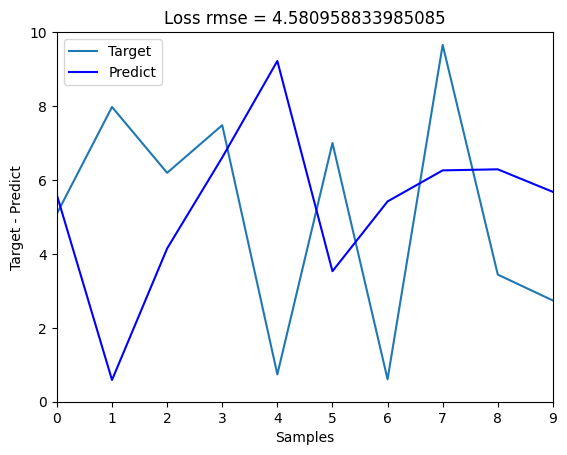

In [ ]:
#@title 💡 Bài 3 | Tính MAE - MSE - RMSE - Graph animation

import math
import random

num_samples = input('Nhập num samples: ')
loss_name = input('Nhập loss name: ')

loss_list = ['mae','mse','rmse']

minrange = 0
maxrange = 10

def is_int(input):
  try:
    int(input)
    return True
  except ValueError:
    return False
def loss_check(input):
  if input in loss_list:
    return True
def random_p_t(n):
  ptrandom =[]
  for i in range(n):
    ptrandom.append(random.uniform(minrange,maxrange))
  return ptrandom
def mae(n):
  predict = random_p_t(n)
  target = random_p_t(n)
  loss_result = 0
  for i in range(n):
    loss_result = loss_result + abs(predict[i]-target[i])
  loss_result = loss_result/n
  return loss_result, predict, target
def mse(n):
  predict = random_p_t(n)
  target = random_p_t(n)
  loss_result = 0
  for i in range(n):
    loss_result = loss_result + (predict[i]-target[i])**2
  loss_result = loss_result/n
  return loss_result, predict, target
def rmse(n):
  predict = random_p_t(n)
  target = random_p_t(n)
  loss_result = mse(n)[0]
  for i in range(n):
    loss_result = loss_result + (predict[i]-target[i])**2
  loss_result = math.sqrt(loss_result/n)
  return loss_result, predict, target

loss_list_fun = [mae,mse,rmse]

def graph_animation(result,loss_name,n):
  import matplotlib.pyplot as plt
  import matplotlib.animation as animation
  from IPython.display import HTML

  def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

  def update(frame):
    x_line = x[:frame + 1]
    y1_line = y1[:frame + 1]
    y2_line = y2[:frame + 1]
    line1.set_data(x_line, y1_line)
    line2.set_data(x_line, y2_line)
    return line1, line2

  # Trục x,y
  x = list(range(n))
  fig, ax = plt.subplots()
  y1 = result[1]
  y2 = result[2]
  line1, = ax.plot([], [], '-', label='Target', marker='')
  line2, = ax.plot([], [], 'b-', label='Predict', marker='')

  # Đặt tên cho trục x và y
  ax.set_xlabel('Samples')
  ax.set_ylabel('Target - Predict')
  ax.set_title(f'Loss {loss_name} = {result[0]}')

  # Đặt giới hạn cho trục x và y
  ax.set_xlim(0, len(result[1]) - 1)
  ax.set_ylim(0, 10)

  # Hiển thị legend (chú thích)
  ax.legend()
  ani = animation.FuncAnimation(fig, update, frames=n, init_func=init, blit=True, interval=200)
  return HTML(ani.to_jshtml())

def cal_loss(n):
  if is_int(n) == False :
    return print('num samples must be a int')
  if loss_check(loss_name) == None:
    return print('loss function must be mae, mse or rmse')
  n=int(n)
  result = loss_list_fun[loss_list.index(loss_name)](n)
  print('------------------------')
  for i in range(n):
    print(f'{loss_name.capitalize()} - Sample[{i+1}] - predict: {result[1][i]} - target: {result[2][i]}')
  print('------------------------')
  print(f'Loss {loss_name}: {result[0]}')
  display(graph_animation(result,loss_name,n))
cal_loss(num_samples)

In [140]:
#@title 💡 Bài 4 | Tính sin - cos - sinh - cosh

import math
pi=math.pi
def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n-1)
def sin(x,n):
  x = x%(2*math.pi)
  sin = 0
  for i in range(n):
    sin += ((-1)**i) * (x**(2*i+1)/(factorial(2*i+1)))
  return sin
def cos(x,n):
  x = x%(2*math.pi)
  cos = 0
  for i in range(n):
    cos += ((-1)**i) * (x**(2*i)/(factorial(2*i)))
  return cos
def sinh(x,n):
  x = x%(2*math.pi)
  sinh = 0
  for i in range(n):
    sinh += (x**(2*i+1)/(factorial(2*i+1)))
  return sinh
def cosh(x,n):
  x = x%(2*math.pi)
  cosh = 0
  for i in range(n):
    cosh += (x**(2*i)/(factorial(2*i)))
  return cosh
cosh(1,10)

1.543080634815244

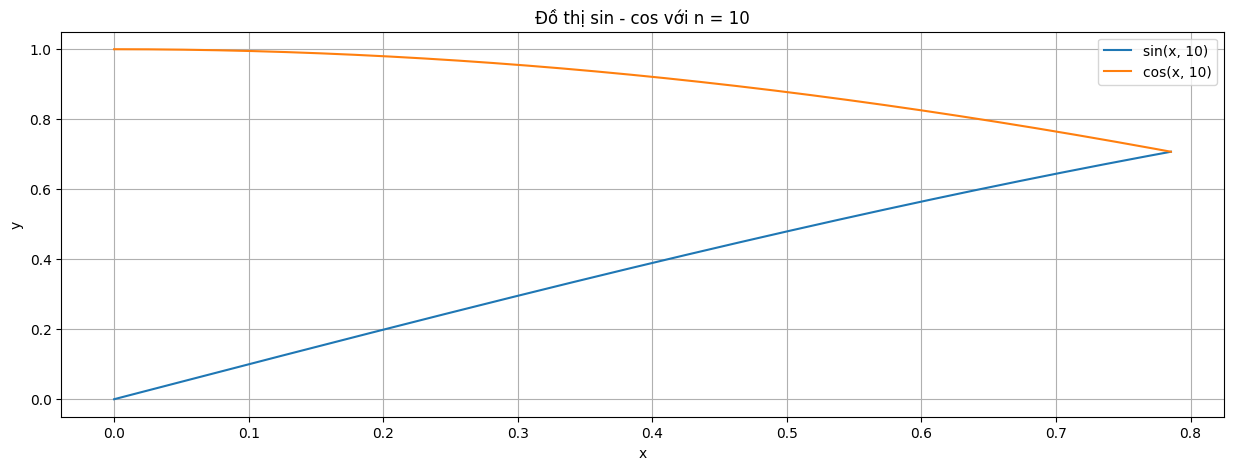

In [ ]:
#@title 💡 Bài 4 | Đồ thị kiểm tra
import numpy as np
import matplotlib.pyplot as plt
n=10
x_values = np.linspace(0, pi/4, 400)
sin_values = [sin(x, n) for x in x_values]
cos_values = [cos(x, n) for x in x_values]

plt.figure(figsize=(15, 5))
plt.plot(x_values, sin_values, label=f'sin(x, {n})')
plt.plot(x_values, cos_values, label=f'cos(x, {n})')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Đồ thị sin - cos với n = {n}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title 💡 Bài 5 | Mean Difference of nth Root Error

def md_rse(y1,y2,n,p):
  return (y1**1/n - y2**1/n)**p
md_rse(100,99.5,1,1)

0.5

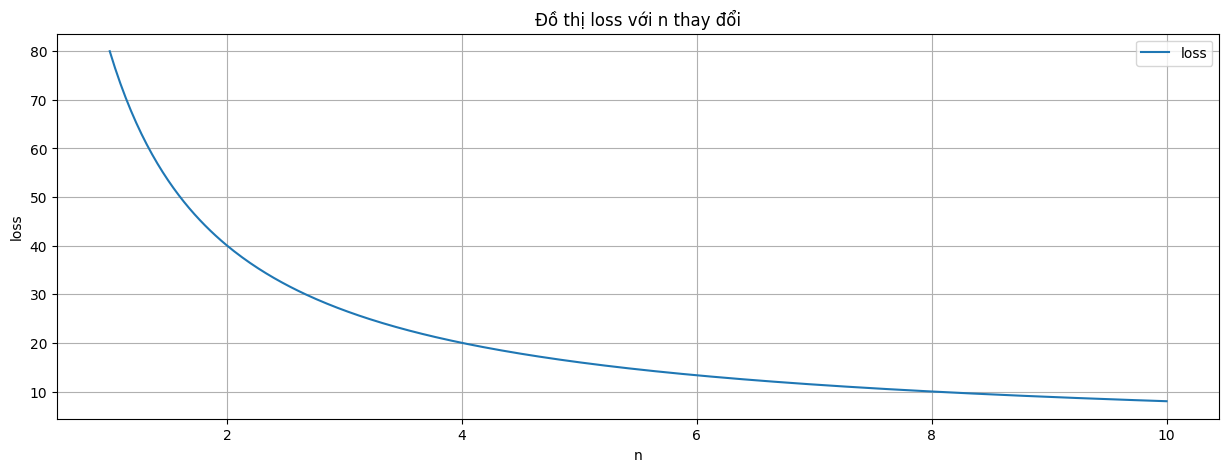

In [ ]:
#@title 💡 Bài 4 | Đồ thị kiểm tra
import numpy as np
import matplotlib.pyplot as plt

nmax=10
y1=100
y2=20
p=1

n = np.linspace(1, nmax, 400)
loss = [md_rse(y1,y2,x,p) for x in n]

plt.figure(figsize=(15, 5))
plt.plot(n,loss,label=f'loss')
plt.xlabel('n')
plt.ylabel('loss')
plt.title(f'Đồ thị loss với n thay đổi')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
a = False
assert a == 0
print(a)

False
